This is an example of how to do INS analysis via deconvolution.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
trials_file = 'sample_data/trials.csv'
trials = pd.read_csv(trials_file)
trials

,index,6000,1001,14000,8016,name,filename,ptrac_filename
0,0,-0.000100,-0.000100,-0.466600,-0.533200,concentration_C_0001_Si_4666,../compute/output/mctal/concentration_C_0001_S...,../compute/output/ptrac/concentration_C_0001_S...
1,1,-0.008667,-0.000300,-0.461600,-0.529433,concentration_C_008666666666666666_Si_4616,../compute/output/mctal/concentration_C_008666...,../compute/output/ptrac/concentration_C_008666...
2,2,-0.017233,-0.000500,-0.456600,-0.525667,concentration_C_017233333333333333_Si_4566,../compute/output/mctal/concentration_C_017233...,../compute/output/ptrac/concentration_C_017233...
3,3,-0.025800,-0.000700,-0.451600,-0.521900,concentration_C_0258_Si_4516,../compute/output/mctal/concentration_C_0258_S...,../compute/output/ptrac/concentration_C_0258_S...
4,4,-0.034933,-0.000967,-0.446267,-0.517833,concentration_C_03493333333333333_Si_446266666...,../compute/output/mctal/concentration_C_034933...,../compute/output/ptrac/concentration_C_034933...
5,5,-0.044067,-0.001233,-0.440933,-0.513767,concentration_C_044066666666666664_Si_44093333...,../compute/output/mctal/concentration_C_044066...,../compute/output/ptrac/concentration_C_044066...
6,6,-0.053200,-0.001500,-0.435600,-0.509700,concentration_C_0532_Si_4356,../compute/output/mctal/concentration_C_0532_S...,../compute/output/ptrac/concentration_C_0532_S...
7,7,-0.073800,-0.002067,-0.423600,-0.500533,concentration_C_0738_Si_4236,../compute/output/mctal/concentration_C_0738_S...,../compute/output/ptrac/concentration_C_0738_S...
8,8,-0.094400,-0.002633,-0.411600,-0.491367,concentration_C_0944_Si_4116,../compute/output/mctal/concentration_C_0944_S...,../compute/output/ptrac/concentration_C_0944_S...
9,9,-0.115000,-0.003200,-0.399600,-0.482200,concentration_C_115_Si_3996,../compute/output/mctal/concentration_C_115_Si...,../compute/output/ptrac/concentration_C_115_Si...


In [8]:
spectrums_file = 'sample_data/spectrums.npz'
spectrums = np.load(spectrums_file)
x = spectrums['x']
y = spectrums['y']
# INS time bin (0-50 ns)
y = y[:, 0, :]

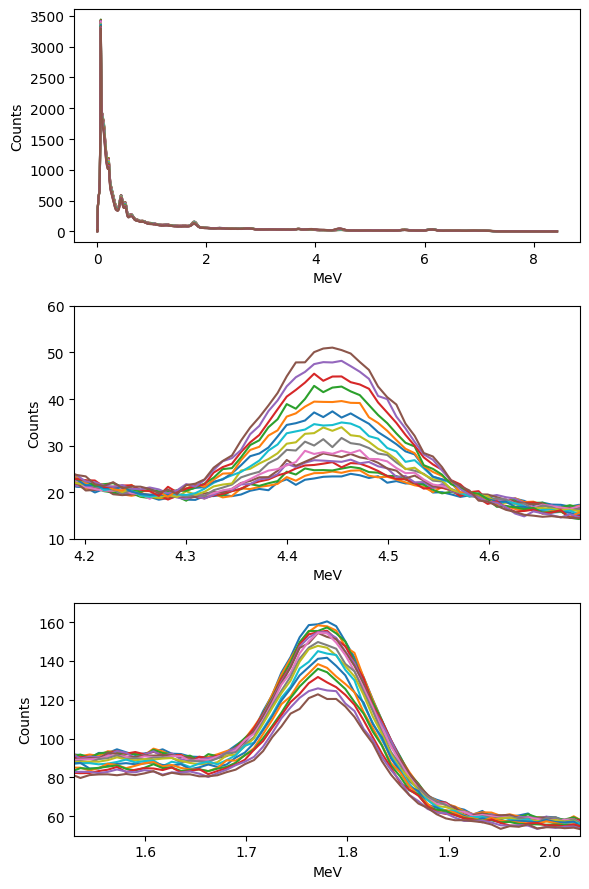

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(6, 9))

# First subplot
for _y in y:
    axs[0].plot(x, _y)
    axs[1].plot(x, _y)
    axs[2].plot(x, _y)

axs[0].set_xlabel('MeV')
axs[0].set_ylabel('Counts')

axs[1].set_xlim(4.44 - 0.25, 4.44 + 0.25)
axs[1].set_ylim(10, 60)
axs[1].set_xlabel('MeV')
axs[1].set_ylabel('Counts')

# Third subplot
axs[2].set_xlim(1.78 - 0.25, 1.78 + 0.25)
axs[2].set_ylim(50, 170)
axs[2].set_xlabel('MeV')
axs[2].set_ylabel('Counts')

plt.tight_layout()
plt.show()


In [10]:
def linearfunc(x, a, b):
    return a * x + b

def gaussianfunc(x, a, b, c):
    return a * np.exp(-((x - b) / c) ** 2)

def geb(x, a, b, c):
    return (a+b*np.sqrt(x+c*(x*x)))*0.60056120439322


def exp_falloff(x,x0,a,p,b):
    return (a*np.exp(-p*(x-x0)))+b

{'nfev': 20, 'fvec': array([ 4.58126033,  3.7464756 ,  3.50203658,  2.03004115, -0.06082124,
        0.17267126, -0.2284378 , -2.14673397, -2.14357603, -1.26916591,
       -3.04501379, -3.46272284, -4.33381514, -3.2212394 , -1.10026593,
       -2.12371577, -2.14088044, -1.93060739, -0.16880633,  1.85941297,
        1.99437198,  1.00815683, -0.4001398 , -0.056471  , -0.01956078,
        0.10239844,  0.3630926 ,  0.94573202, -1.32362829,  0.44101087,
       -1.77904252,  0.35001162, -1.36344548,  0.12910233,  0.00604621,
       -0.38050384,  1.98100201,  1.17151683,  2.10078324,  1.57091099,
        0.28876227,  1.18952056,  1.86765223,  0.98026866,  0.21598489,
        0.6032392 ,  1.48110643,  1.24865821,  0.44558242,  0.15443172,
        1.37289906, -0.1817915 , -0.01947933, -1.12161618, -1.64743426,
       -3.76178223, -2.44254426, -2.28306323, -1.62328801, -1.3732354 ,
       -1.73276424, -0.97162153, -0.87894178, -1.28264533, -0.86769265,
       -0.03315045, -0.59716707, -1.8095343

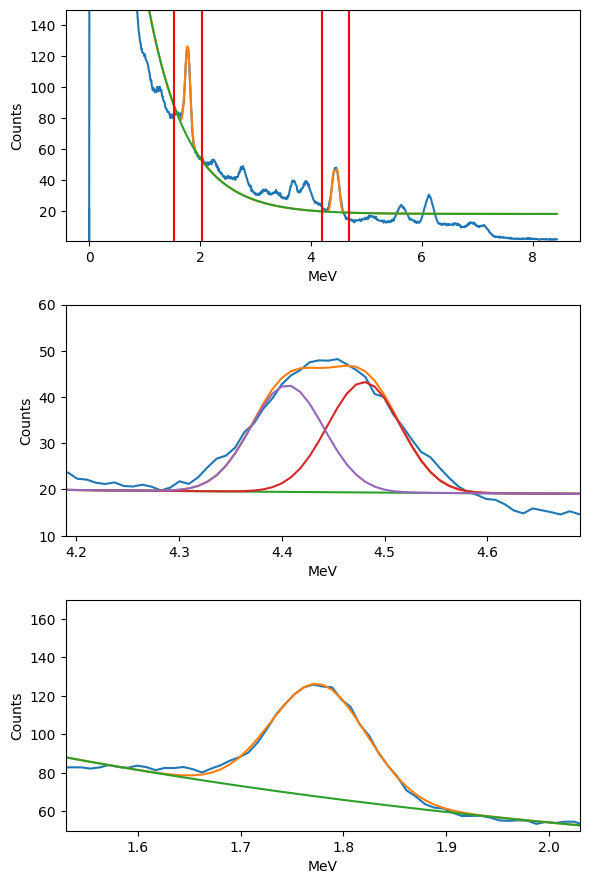

In [31]:
# baseline = lambda x, a, b: linearfunc(x, a, b)
# baseline_p0 = [0, 0]
# basline_lower = [-np.inf, -np.inf]
# basline_upper = [np.inf, np.inf]

baseline = lambda x, x0, a, p, b: exp_falloff(x,x0,a,p,b)
baseline_p0 = [1.78, 100, 1, 0]
basline_lower = [1.78 - 0.25, 0, 0, 0]
basline_upper = [1.78 + 0.25, np.inf, np.inf, np.inf]

si_peak = lambda x, a, b, c: gaussianfunc(x, a, b, c)
si_peak_p0 = [100, 1.78, 0.1]
si_peak_lower = [0, 1.78 - 0.25, 0]
si_peak_upper = [np.inf, 1.78 + 0.25, np.inf]

cs_peak_1 = lambda x, a, b, c: gaussianfunc(x, a, b, c)
cs_peak_1_p0 = [100, 4.44, 0.01]
cs_peak_1_lower = [0, 4.44 - 0.25, 0]
cs_peak_1_upper = [np.inf, 4.44 + 0.25, .05]

cs_peak_2 = lambda x, a, b, c: gaussianfunc(x, a, b, c)
cs_peak_2_p0 = [100, 4.44, 0.01]
cs_peak_2_lower = [0, 4.44 - 0.25, 0]
cs_peak_2_upper = [np.inf, 4.44 + 0.25, .05]

def total(x, *p):
    return baseline(x, *p[:len(baseline_p0)]) + si_peak(x, *p[len(baseline_p0):len(baseline_p0) + len(si_peak_p0)]) + cs_peak_1(x, *p[len(baseline_p0) + len(si_peak_p0):len(baseline_p0) + len(si_peak_p0) + len(cs_peak_1_p0)]) + cs_peak_2(x, *p[len(baseline_p0) + len(si_peak_p0) + len(cs_peak_1_p0):len(baseline_p0) + len(si_peak_p0) + len(cs_peak_1_p0) + len(cs_peak_2_p0)])
total_p0 = baseline_p0 + si_peak_p0 + cs_peak_1_p0 + cs_peak_2_p0
total_lower = basline_lower + si_peak_lower + cs_peak_1_lower + cs_peak_2_lower
total_upper = basline_upper + si_peak_upper + cs_peak_1_upper + cs_peak_2_upper
# Fit the total
p0 = total_p0
bounds = (total_lower, total_upper)

indx = ((x > 4.44 - 0.25) & (x < 4.44 + 0.25)) | ((x > 1.78 - 0.25) & (x < 1.78 + 0.25))

# make sure to limit the fit to the region of interest
fig, axs = plt.subplots(3, 1, figsize=(6, 9))


# First subplot
for _y in y[-2:-1]:
    x_fit = x[indx]
    y_fit = _y[indx]
    popt, pcov, infodict, mesg, ier,  = curve_fit(
        total, 
        x_fit, 
        y_fit, 
        p0=p0,
        bounds=bounds,
        full_output=True
        )
    
    print(infodict)

    _y_fit = total(x, *popt)
    _baseline = baseline(x, *popt[:len(baseline_p0)])
    _cs_peak_1 = cs_peak_1(x, *popt[len(baseline_p0):len(baseline_p0) + len(cs_peak_1_p0)]) 
    _cs_peak_2 = cs_peak_2(x, *popt[len(baseline_p0) + len(cs_peak_1_p0):len(baseline_p0) + len(cs_peak_1_p0) + len(cs_peak_2_p0)])
    axs[0].plot(x, _y)
    axs[0].plot(x, _y_fit)
    axs[0].plot(x, _baseline)
    # draw vertical lines at the edges of the fit region
    axs[0].axvline(x=4.44 - 0.25, color='r')
    axs[0].axvline(x=4.44 + 0.25, color='r')
    axs[0].axvline(x=1.78 - 0.25, color='r')
    axs[0].axvline(x=1.78 + 0.25, color='r')

    axs[1].plot(x, _y)
    axs[1].plot(x, _y_fit)
    axs[1].plot(x, _baseline)
    axs[1].plot(x, _cs_peak_2 + _baseline)
    axs[1].plot(x, _y_fit-(_cs_peak_2))

    axs[2].plot(x, _y)
    axs[2].plot(x, _y_fit)
    axs[2].plot(x, _baseline)

axs[0].set_xlabel('MeV')
axs[0].set_ylabel('Counts')
# make log scale
axs[0].set_ylim(1, 150)

axs[1].set_xlim(4.44 - 0.25, 4.44 + 0.25)
axs[1].set_ylim(10, 60)
axs[1].set_xlabel('MeV')
axs[1].set_ylabel('Counts')

# Third subplot
axs[2].set_xlim(1.78 - 0.25, 1.78 + 0.25)
axs[2].set_ylim(50, 170)
axs[2].set_xlabel('MeV')
axs[2].set_ylabel('Counts')

plt.tight_layout()
plt.show()